<div dir=ltr align=center>
    <img src="./pic/arm-khorasan.png" width="197" height="170">
    <p>موسسه آموزش عالی خراسان</p>
</div>

<div dir="rtl">
در این نوت‌بوک، الگوریتم K-Nearest Neighbors (KNN) را به‌عنوان یک روش ساده و مبتنی بر شباهت برای طبقه‌بندی جریان‌های شبکه مورد استفاده قرار می‌دهیم. داده‌های
NetFlow شامل ویژگی‌هایی از جریان‌های ارتباطی در شبکه هستند که می‌توان با تحلیل آن‌ها الگوهای عادی و غیرعادی ترافیک را تشخیص داد. در ادامه، پس از انجام مراحل پیش‌پردازش، مدل KNN آموزش داده شده و عملکرد آن در طبقه‌بندی ترافیک شبکه ارزیابی خواهد شد.
</div>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1siH9RlvWNh8_b2PGp_FsICH89GSYKV7I?authuser=1#scrollTo=2f455d8e)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score , ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import gdown

In [2]:
file_id = "1NcWA37QoVcF5Nbx55EjkRu6bumfxSyq6"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "NF-BoT-IoT.csv", quiet=True)

'NF-BoT-IoT.csv'

In [3]:
df = pd.read_csv('./NF-BoT-IoT.csv')
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.100.6,52670,192.168.100.1,53,17,5.212,71,126,1,1,0,4294966,0,Benign
1,192.168.100.6,49160,192.168.100.149,4444,6,0.000,217753000,199100,4521,4049,24,4176249,1,Theft
2,192.168.100.46,3456,192.168.100.5,80,17,0.000,8508021,8918372,9086,9086,0,4175916,0,Benign
3,192.168.100.3,80,192.168.100.55,8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0,Benign
4,192.168.100.46,80,192.168.100.5,80,6,7.000,8374706,0,9086,0,0,4175916,0,Benign


## Binary Class

In [ ]:
print(df['Label'].unique())

[0 1]


In [ ]:
df_b = df.drop(columns = ['IPV4_DST_ADDR' , 'IPV4_SRC_ADDR' , 'Attack'])

In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 600100 non-null  int64  
 1   L4_DST_PORT                 600100 non-null  int64  
 2   PROTOCOL                    600100 non-null  int64  
 3   L7_PROTO                    600100 non-null  float64
 4   IN_BYTES                    600100 non-null  int64  
 5   OUT_BYTES                   600100 non-null  int64  
 6   IN_PKTS                     600100 non-null  int64  
 7   OUT_PKTS                    600100 non-null  int64  
 8   TCP_FLAGS                   600100 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 10  Label                       600100 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 50.4 MB


In [ ]:
X_b = df_b.drop(columns=['Label'])
Y_b = df_b['Label']

<div dir=ltr align=center>
    <img src="./pic/Slide1.JPG" >
</div>

In [ ]:
X_train_val , X_test , y_train_val , y_test = train_test_split(X_b ,Y_b , test_size=0.2 , random_state=42)

<div dir=ltr align=center>
    <img src="./pic/Slide2.JPG">
</div>

In [ ]:
X_train , X_val , y_train , y_val = train_test_split(X_train_val , y_train_val , test_size=0.2 , random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
accuracy = []
f1 = []
n_values = range(1,20)
for i in n_values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train , y_train)
    y_pred_val = model.predict(X_val)
    accuracy.append(accuracy_score(y_val , y_pred_val))
    f1.append(f1_score(y_val , y_pred_val, pos_label=1))

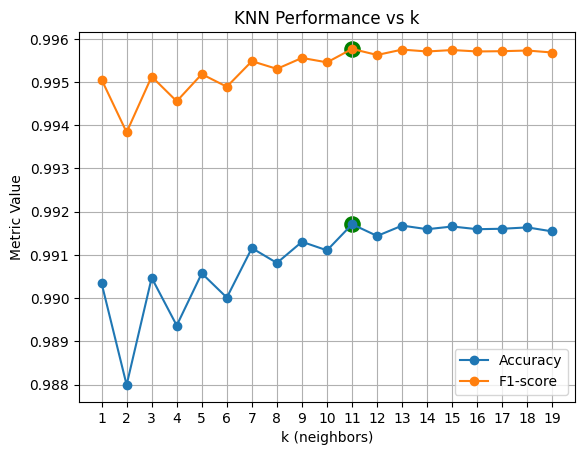

In [ ]:
plt.plot(n_values, accuracy, marker='o', label='Accuracy')
plt.plot(n_values, f1, marker='o', label='F1-score')

plt.xlabel('k (neighbors)')
plt.ylabel('Metric Value')
plt.title('KNN Performance vs k')
plt.legend()
plt.grid(True)
plt.xticks(n_values)
i_max_acc = accuracy.index(max(accuracy))
plt.scatter(n_values[i_max_acc], accuracy[i_max_acc], s=120, color='green')
i_max_f1 = f1.index(max(f1))
plt.scatter(n_values[i_max_f1], f1[i_max_f1], s=120, color='green')
plt.show()

In [ ]:
print(i_max_acc +1  , i_max_f1 +1 )

11 11


In [ ]:
final_model_knn = KNeighborsClassifier(n_neighbors=11)
final_model_knn.fit(X_train , y_train)

,n_neighbors,13
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = final_model_knn.predict(X_test)

In [ ]:
print('accuracy_score' , accuracy_score(y_test , y_pred))
print('f1_score' , f1_score(y_test , y_pred , average = 'weighted'))

accuracy_score 0.9925929011831361
f1_score 0.9921651277966341


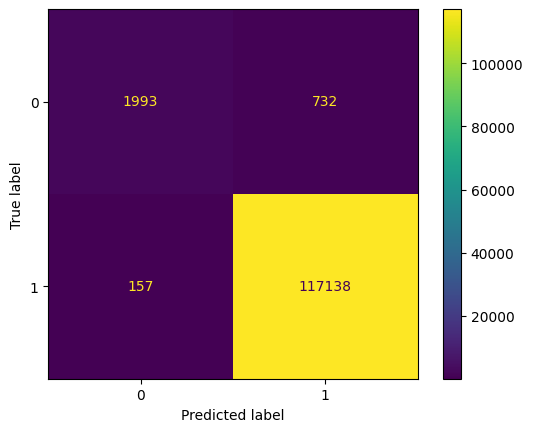

In [ ]:
ConfusionMatrixDisplay.from_estimator(final_model_knn , X_test , y_test)

## Multi Class

In [ ]:
print(df['Label'].unique())
print(df['Attack'].unique())


[0 1]
['Benign' 'Theft' 'DDoS' 'DoS' 'Reconnaissance']


In [ ]:
mapping = {
    'Benign': 0,
    'Theft': 1,
    'DDoS': 2,
    'DoS': 3,
    'Reconnaissance': 4
}

df['Attack'] = df['Attack'].map(mapping)

In [ ]:
df['Attack'].value_counts()

Attack
4    470655
2     56844
3     56833
0     13859
1      1909
Name: count, dtype: int64

In [ ]:
df_m = df.drop(columns = ['IPV4_DST_ADDR' , 'IPV4_SRC_ADDR' , 'Label'])

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 600100 non-null  int64  
 1   L4_DST_PORT                 600100 non-null  int64  
 2   PROTOCOL                    600100 non-null  int64  
 3   L7_PROTO                    600100 non-null  float64
 4   IN_BYTES                    600100 non-null  int64  
 5   OUT_BYTES                   600100 non-null  int64  
 6   IN_PKTS                     600100 non-null  int64  
 7   OUT_PKTS                    600100 non-null  int64  
 8   TCP_FLAGS                   600100 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 10  Attack                      600100 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 50.4 MB


In [ ]:
X = df_m.drop(columns=['Attack'])
Y = df_m['Attack']

<div dir=ltr align=center>
    <img src="./pic/Slide1.JPG" >
</div>

In [ ]:
X_train_val , X_test , y_train_val , y_test = train_test_split(X ,Y , test_size=0.2 , random_state=42)

<div dir=ltr align=center>
    <img src="./pic/Slide2.JPG">
</div>

In [ ]:
X_train , X_val , y_train , y_val = train_test_split(X_train_val , y_train_val , test_size=0.2 , random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
accuracy = []
f1 = []
n_values = range(1,20)
for i in n_values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train , y_train)
    y_pred_val = model.predict(X_val)
    accuracy.append(accuracy_score(y_val , y_pred_val))
    f1.append(f1_score(y_val , y_pred_val, average = 'weighted'))

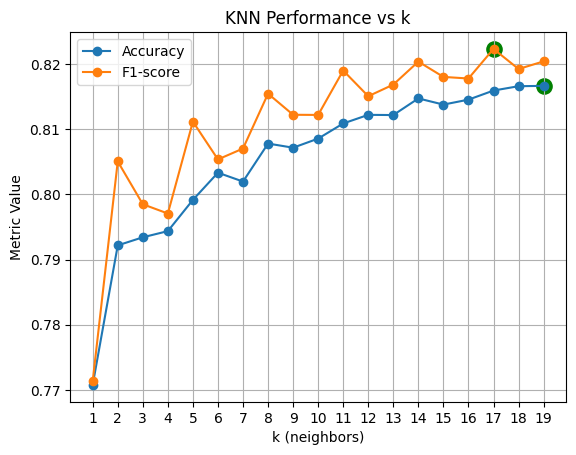

In [ ]:
plt.plot(n_values, accuracy, marker='o', label='Accuracy')
plt.plot(n_values, f1, marker='o', label='F1-score')

plt.xlabel('k (neighbors)')
plt.ylabel('Metric Value')
plt.title('KNN Performance vs k')
plt.legend()
plt.grid(True)
plt.xticks(n_values)
i_max_acc = accuracy.index(max(accuracy))
plt.scatter(n_values[i_max_acc], accuracy[i_max_acc], s=120, color='green')
i_max_f1 = f1.index(max(f1))
plt.scatter(n_values[i_max_f1], f1[i_max_f1], s=120, color='green')
plt.show()

In [ ]:
print(i_max_acc +1  , i_max_f1 +1 )

19 17


In [ ]:
final_model_knn = KNeighborsClassifier(n_neighbors=19)
final_model_knn.fit(X_train , y_train)

,n_neighbors,19
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = final_model_knn.predict(X_test)

In [ ]:
print('accuracy_score' , accuracy_score(y_test , y_pred))
print('f1_score' , f1_score(y_test , y_pred , average = 'weighted'))

accuracy_score 0.8169471754707549
f1_score 0.8207672379630575


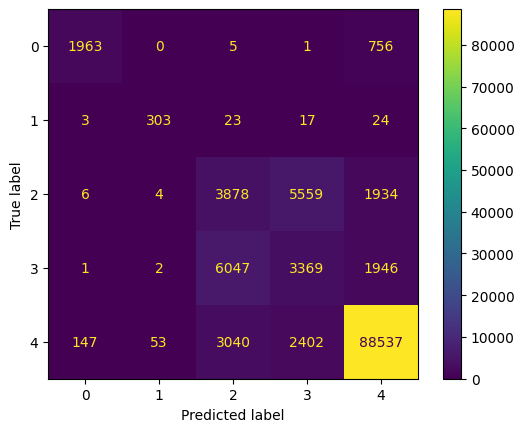

In [ ]:
ConfusionMatrixDisplay.from_estimator(final_model_knn , X_test , y_test)